# Project 2
### Group 3: Francisco Belliard, Arturo Fillo Villa, Christian Allen

### Import python modules

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score;
from sklearn.preprocessing import normalize as nm
import quadratic as quad
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

### Read in, store, and preprocess dataset

In [18]:
#load breast cancer data (same from UCI repo)
table = sk.load_breast_cancer() 

#store attribute vectors (without class label)
X = table.data

#store class labels
labels = table.target

#convert to dataframe

df = pd.DataFrame(table.data,columns=table.feature_names)

#append class label to dataframe
df['class'] = labels

df

# #print dataframe
# df
#  ################# Dataset 2 ########################
# x_center = 5
# y_center = 5
# num_samples = 150
# S1 = np.random.normal(size = (num_samples, 2))
# S4 = np.array([[x_center,y_center]], dtype=np.float32)+np.random.normal(size =(num_samples, 2))
# #Points for C1
# S2 = np.array([[0,y_center]], dtype=np.float32)+np.random.normal(size =(num_samples, 2))
# S3 = np.array([[x_center,0]], dtype=np.float32)+np.random.normal(size =(num_samples, 2))


# #construct label vectors (C0 = 0, C1 = 1)
# labels1 = np.zeros(num_samples*2)
# labels2 = np.ones(num_samples*2)
# #associate samples and lables
# C0=np.concatenate((S1,S4),axis = 0)
# C1=np.concatenate((S2,S3),axis = 0)
# S = np.concatenate((C0,C1),axis = 0)
# labels = np.concatenate((labels1,labels2), axis = 0)
# colors=[]
# for value in labels:
#     if value==0:
#         colors.append('red')
#     else:
#         colors.append('blue')
# #Better Label Stuff 
# x=S[:,0]
# y=S[:,1]
# #Plot all data points
# # plt.style.use("seaborn")
# plt.scatter(x,y, c = colors )
# plt.title('Full data set')
# # plt.colorbar(cmap='rwb')
# plt.show()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Show dataset info

In [19]:
#show number of each class
print(df['class'].value_counts())

########### Oversampling ##########
# sm = SMOTE()
# X_res, labels_res = sm.fit_sample(X, labels)
# print('Resampled dataset shape {}'.format(Counter(labels_res)))

######## Undersample #############

# rus = RandomUnderSampler()
# X_res, labels_res = rus.fit_sample(X, labels) 
# print('Resampled dataset shape {}'.format(Counter(labels_res)))

1    357
0    212
Name: class, dtype: int64


### Shuffle and split data into training and testing set

In [20]:
#70-30 split
trainSet, testSet, trainLabel, testLabel = train_test_split(X,labels,test_size=0.3, shuffle=True,)
# trainSet, testSet, trainLabel, testLabel = train_test_split(X_res,labels_res,test_size=0.3, shuffle=True,)

trainDF = pd.DataFrame(trainSet)
testDF = pd.DataFrame(testSet)
trainLabelDF = pd.DataFrame(trainLabel)
testLabelDF = pd.DataFrame(testLabel)
normTrain = nm(trainDF)
normTest = nm(testDF)
# print(pd.DataFrame(normTest))
# print(pd.DataFrame(normTrain))

### Implement PLA on data
#### Test 1: Epoch = 100, Learning Rate = 0.3


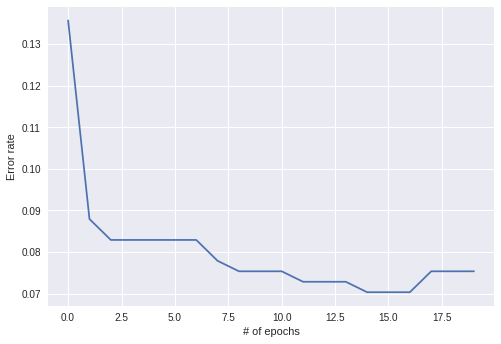

Max Accuracy, At Epoch #
0.9296482412060302 14


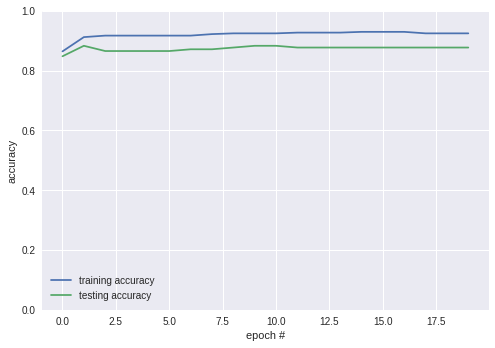

In [21]:
from percep import Perceptron
# from perceptron_class import Perceptron
ptron = Perceptron()
epoch = 100
lrate = 0.3
wt_matrix = ptron.fit(normTrain,trainLabel,normTest,testLabel,epoch,lrate)
# print(pd.DataFrame(wt_matrix))

#### Test 2: Epoch = 20, Learning Rate = 0.5

In [23]:
# wt_matrix = ptron.fit(normTrain,trainLabel,100,0.5)
# print(wt_matrix.shape)
# plt.scatter(wt_matrix[:,0],wt_matrix[:,1])
# plt.show()


# # X - some data in 2dimensional np.array

# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                      np.arange(y_min, y_max, h))

# # here "model" is your model's prediction (classification) function
# Z = model(np.c_[xx.ravel(), yy.ravel()]) 

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=pl.cm.Paired)
# plt.axis('off')

# # Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

### Predict using test data


In [24]:
predTest = ptron.predict(trainSet)
print(accuracy_score(trainLabel,predTest))

0.9296482412060302


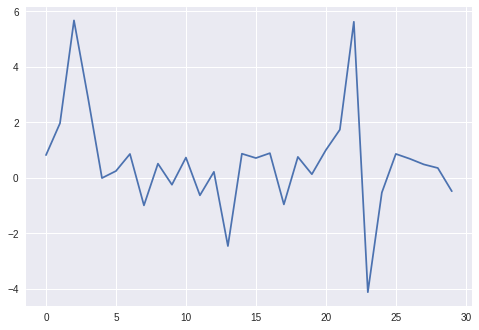

In [14]:
plt.plot(wt_matrix[-1,:])
plt.show()

### Make it pretty

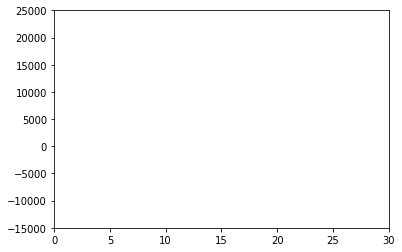

In [34]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

# animation function.
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [37]:
print(animation.writers.list())


['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


In [38]:
anim.save('animation.gif', writer='pillow', fps=50)


In [15]:
HTML(anim.to_jshtml())
